#1. 데이터셋(Raw dataset) EDA + Feature Engineering


**A. 데이터셋 및 라이브러리 불러오기**

In [1]:
import pandas as pd              #dataframe EDA를 하기 위한 library
import numpy as np               #library for numeric data
import matplotlib.pyplot as plt  #시각화를 위한 library
import seaborn as sns            #시각화를 위한 library
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [2]:
df = pd.read_csv('vgames2.csv', index_col= 0) #TIP: 'Unnamed'컬럼 제거 방법 index_col = 0으로 간단히 처리
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
df_copy = df.copy()     #EDA하기 전 Dataset copy만들어놓기

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


**결측치 확인**

In [5]:
df[df['Name'].isnull() | df['Platform'].isnull() | df['Genre'].isnull()| df['Publisher'].isnull()| df['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
...,...,...,...,...,...,...,...,...,...
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0
16432,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0,0,0.01
16433,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01
16556,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01


In [6]:
df.duplicated().sum()     #결과: 중복치없음 // 중복위치확인: duplicateDFrow = df[df.duplicated()]
df.isnull().sum()         #결과: 'Year', 'Genre', 'Publisher' 각 컬럼에서 271, 50, 58개의 결측치 확인 

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

**B. Raw Data가 가지는 이슈**
1. N/A 결측치 존재(주로 'Year'컬럼)
2. 'Platform' 컬럼에 숫자가 들어가 있음 
3. 'Year'컬럼이 float 타입이며, 한 자리 또는 두 자리 숫자로 되어 있는 데이터가 존재함
4. 'Genre'컬럼에 공백이 있음
5. 'Publisher'컬럼에 'unknown'이라고 대체되어 있음
6. 출고량 컬럼: 데이터 단위가 object & 숫자단위 K,M가 붙어있는 데이터들이 있어 전체적인 데이터의 단위 일관성을 찾기 힘듦


**C. 결측치 및 중복치 확인 및 제거(isnull(),duplicated(), drop() 메소드 활용)**

In [7]:
df = df.dropna(axis = 0)  #결과: N/A 결측치 358개 제거 (결측치가 데이터셋 2%차지)
df = df.reset_index(drop=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


**D. 데이터 각 Variable들 데이터 타입 확인(dtypes, info) 데이터셋 크기확인(shape)**

In [8]:
df.dtypes                      #결과: 'Year'컬럼 데이터 타입은 float 
df = df.astype({'Year':'int'}) #결과 'Year'컬럼을 int형으로 변환 -> 문제점4번 해결
print(df.shape)                #결과: 데이터프레임 크기확인
df

(16241, 9)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


한 자리 또는 두 자리 숫자로 되어 있는 'Year' value들을 함수를 통해 데이터를 올바른 형식(4자리)로 바꾸기 



-> 문제가 되는 'Year'컬럼의 한 자리 및 두 자리 숫자들의 수치를 우선 파악하고(step1), 해당 value들이 'Year'컬럼이 1900년대 후반 ~2000년대로 들어올 수 있게 이에 맞는 함수를 제작한다(step2).

In [9]:
#step1
dfyearlessthan22 = np.array(df.loc[df['Year'] <= 22,'Year']) #22보다 작은 데이터를 찾아 +2000하면 2000년대로 value값을 정정할 수 있다.
print(dfyearlessthan22)            #22보다 작은 'Year'컬럼 내 데이터들을 배열형태로 표현
print(dfyearlessthan22.sum())      #총 711개 

# 22보다 크고 100보다 작은 'Year'컬럼 value 값을 +1900하면 1900년대로 value값을 정정할 수 있다.

#step2
def year(x):
  if (x >= 0) & (x <= 22):
    return int(2000 + x)
  elif (x > 22) & (x < 100):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)
df

[ 9 11 15  3  9  3  6  9  8  1  6  5  4  9 11 10  8  6  7 16  9 10 14  5
  3 15  3 11 10  8 11 16 14  6  8 15  8 15  6 10  9  2 16  3 13  6  1  3
 11  3  8  7  0 11  9  9  9 11  6 10 12 13  2  5 16 11 10 12  7  5 10  9
  4  0 11  4  8  4 16 11  8  2 15  8  8  0]
711


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


출고량 컬럼: 데이터 단위가 object & 숫자단위 K,M가 붙어있는 데이터들이 있어 전체적인 데이터의 단위 일관성을 찾기 힘듦

In [10]:
df['NA_Sales'] = df['NA_Sales'].replace({'K': '*0.001', 'M': '*1'}, regex=True).map(pd.eval).astype(float)
df['EU_Sales'] = df['EU_Sales'].replace({'K': '*0.001', 'M': '*1'}, regex=True).map(pd.eval).astype(float)
df['JP_Sales'] = df['JP_Sales'].replace({'K': '*0.001', 'M': '*1'}, regex=True).map(pd.eval).astype(float)
df['Other_Sales'] = df['Other_Sales'].replace({'K': '*0.001', 'M': '*1'}, regex=True).map(pd.eval).astype(float)

FEATURE ENGINEERING - Global_Sales

In [11]:
df['Global_Sales'] = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


FEATURE ENGINEERING - Years

In [12]:
#구간을 나누는 이유: 연도별 유행하는 장르, 플랫폼 등 시각화할 때 연도를 10년단위 구간으로 설정함으로서 더 심플하게 시각화할 수 있다고 생각함
df['Year'].describe() #표준편차 값: 5.83, 최소값: 1980(년), 최대값: 2020(년)
bins = list(range(1980, 2021, 10))
bins_label = [str(x) + "~" + str(x+10) for x in bins]
df['Years'] = pd.cut(df['Year'], bins, right=False, labels=bins_label[:-1]).astype(object)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04,2000~2010
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18,2000~2010
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02,2010~2020
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04,2010~2020
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25,2010~2020
...,...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20,2000~2010
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01,2000~2010
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,2010~2020
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,2010~2020


#2. 시각화(Visualization) 및 가설검정(Hypothesis Test)



**A. 대륙별 선호 장르(Genre) 시각화**

In [13]:
df_genre = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
df_genre=df_genre.groupby('Genre',as_index=False).sum()
df_genre['Total_Sales'] = df_genre[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
df_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,858.75,513.64,156.60,183.99,1712.98
1,Adventure,101.79,63.66,51.87,16.70,234.02
2,Fighting,220.35,99.90,87.14,36.15,443.54
3,Misc,394.73,208.15,104.18,72.64,779.70
4,Platform,445.38,200.63,130.53,51.45,827.99
5,Puzzle,121.58,50.47,56.24,12.44,240.73
6,Racing,354.70,235.02,56.32,76.51,722.55
7,Role-Playing,318.76,183.09,342.93,56.73,901.51
8,Shooter,574.48,310.23,38.18,101.86,1024.75
9,Simulation,181.43,112.99,63.54,31.32,389.28


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

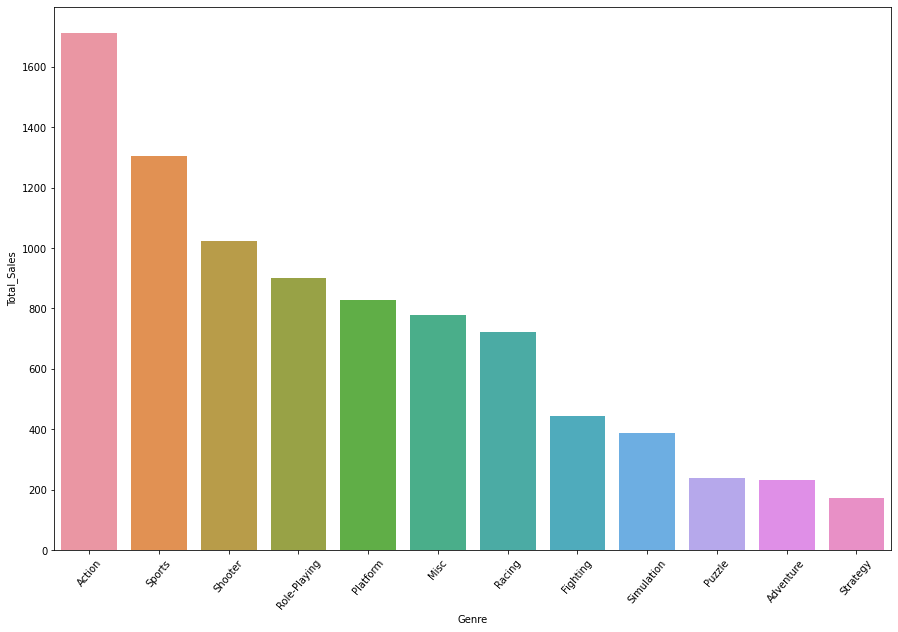

In [14]:
df_genre1 = df_genre.groupby(by=['Genre'])['Total_Sales'].sum()
df_genre1 = df_genre1.reset_index()
df_genre1 = df_genre1.sort_values(by=['Total_Sales'], ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Total_Sales", data=df_genre1)
plt.xticks(rotation=50)

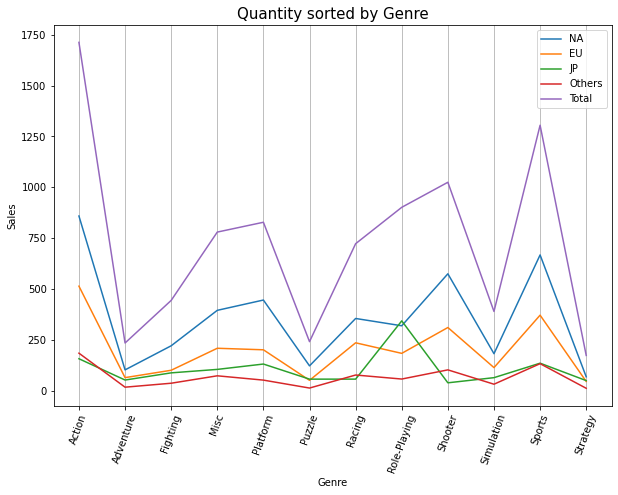

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(df_genre['NA_Sales'],label="NA")
plt.plot(df_genre['EU_Sales'],label="EU")
plt.plot(df_genre['JP_Sales'],label="JP")
plt.plot(df_genre['Other_Sales'],label="Others")
plt.plot(df_genre['Total_Sales'],label="Total")
plt.xlabel('Genre',fontsize=10)
plt.ylabel('Sales',fontsize=10)
plt.grid(axis='x')
x = range(0,12)
labels = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']
plt.xticks(x,labels,rotation = 70)
plt.title("Quantity sorted by Genre",fontsize=15)
plt.legend()
plt.show()

**시각화를 통해 본 해석**

1.   일본에서 'Role-Playing' 장르가 다른 대륙의 나라들보다 선호 경향이 상대적으로 강하다.
2.   반면, 다른 대륙의 나라들에서는 'Shooter' 장르선호가 일본보다 상대적으로 강하다
3. 또한, 일본 제외한 다른 대륙 나라들은 'Action'과 'Sports'장르가 다른 장르보다 더 강하다.


In [16]:
#가설검정(Hypothesis Test)
#대륙별 선호장르 경향이 없다/있다 (H0/H1)
  #귀무가설(H0): 대륙별 선호장르가 같다.
  #대립가설(H1): 대륙별 선호장르가 다르다.
#카이검정제곱으로 검정한다. 
#카이검정제곱: 두 불연속변수 사이의 상관관계 유무를 검정하는 검정기법
#if함수를 통해 p값을 구하고 p값이 0.05보다 작으면 귀무가설을 기각하고 대립가설을 채택한다.
from scipy.stats import chi2_contingency
chi2_val, p, dof, expected= chi2_contingency(df_genre[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']], correction=False)
if (p<0.05) :
   print('p value:', p, '귀무가설을 기각한다. 즉, 대륙별 선호하는 장르가 다르다.')
else :
   print('p value:', p, '귀무가설을 기각하지 하지못한다. 즉, 별 선호하는 장르가 같다.')

p value: 9.635373883688875e-123 귀무가설을 기각한다. 즉, 대륙별 선호하는 장르가 다르다.


**-------------------------------------------------------------------------------------------------------------------------------------------------------------**

 **B.연도별 트렌드(Genre) 시각화** 

In [ ]:
#연도별 (총출고량 최대값기준) 가장 선호하는 Genre 파악
df_yeargenre = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
df_yeargenre_bool = df_yeargenre.groupby('Year')['Global_Sales'].transform(max) == df_yeargenre['Global_Sales']
df_yeargenre_max = df_yeargenre[df_yeargenre_bool].reset_index(drop=True)
df_yeargenre_max
#연도별 각 대륙에서 가장 많이 유행한 Genre을 파악

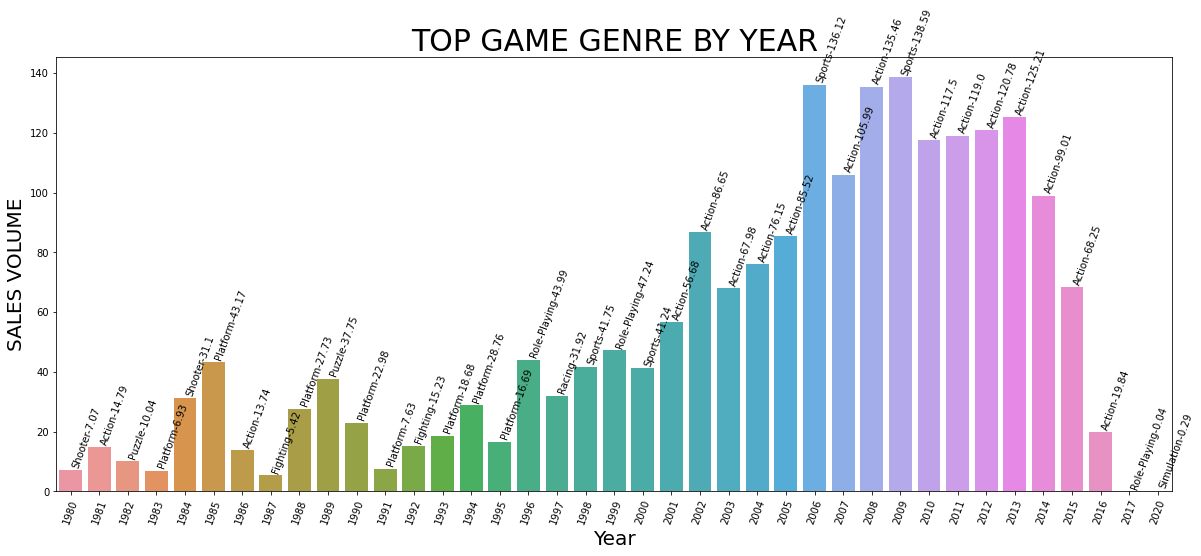

In [ ]:
genre = df_yeargenre_max['Genre']

plt.figure(figsize=(20, 8))
g = sns.barplot(x='Year', y='Global_Sales', data=df_yeargenre_max)

index = 0
for value in df_yeargenre_max['Global_Sales']:
    g.text(index, value + 1, str(genre[index] + '-' +str(round(value, 2))), color='#000', size=10, rotation= 70)
    index += 1

plt.title("TOP GAME GENRE BY YEAR", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("SALES VOLUME", fontsize=20)

plt.xticks(rotation=70)
plt.show()

In [ ]:
#df_yeargenre2 = df.groupby(['Year','Genre'], as_index=False)['Global_Sales'].sum()
#df_yeargenre2

Text(0.5, 1.0, '2010-2020 Global_Sales by Genre')

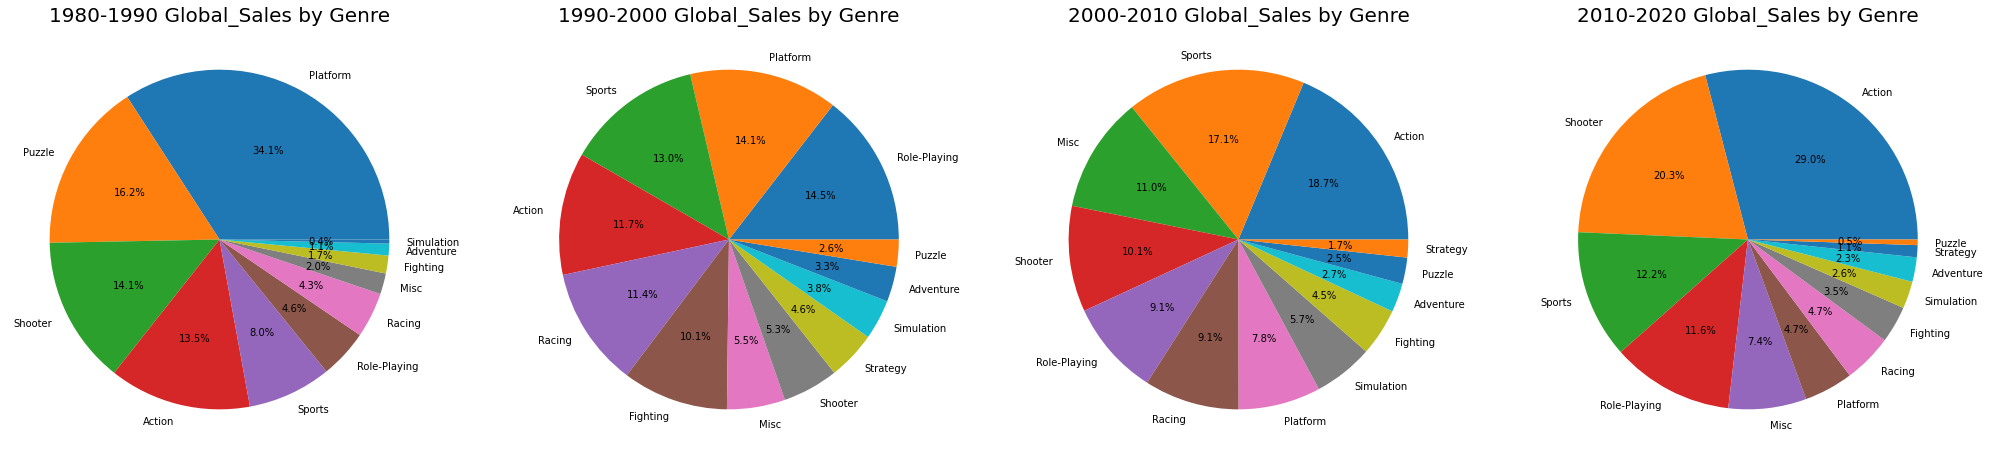

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (35,25))
#총4개의 시각화를 각각 순서로 지정하여 ax[n]
# 1980-1990 장르별 출고량
pie198090 = df[df['Year'] <= 1990].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
labels1990 = pie198090.index
ax[0].pie(pie198090,labels =labels1990, autopct='%.1f%%',textprops={'fontsize': 10})
ax[0].set_title('1980-1990 Global_Sales by Genre',fontsize = 20)

# 1990-2000 장르별 출고량
pie902000 = df[(df['Year'] > 1990)&(df['Year'] <= 2000)].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
labels2000 = pie902000.index
ax[1].pie(pie902000,labels =labels2000, autopct='%.1f%%',textprops={'fontsize': 10})
ax[1].set_title('1990-2000 Global_Sales by Genre',fontsize = 20)

# 2000-2010 장르별 출고량
pie200010 = df[(df['Year'] > 2000)&(df['Year'] <= 2010)].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
labels2010 = pie200010.index
ax[2].pie(pie200010,labels =labels2010, autopct='%.1f%%',textprops={'fontsize': 10})
ax[2].set_title('2000-2010 Global_Sales by Genre',fontsize = 20)

# 2010-2020 장르별 출고량
pie201020 = df[(df['Year'] > 2010)&(df['Year'] <= 2020)].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
labels2020 = pie201020.index
ax[3].pie(pie201020,labels =labels2020, autopct='%.1f%%',textprops={'fontsize': 10})
ax[3].set_title('2010-2020 Global_Sales by Genre',fontsize = 20)

해석
1.   Platform 장르는 해가 갈수록 인기도는 떨어졌다.
2.   반면 Action과 Sports 장르는 해가 갈수록 인기도가 상승했다.
3.   Shooter는 1990년도, 2000년도 각 10년동안 인기도가 떨어졌으나 초창기 1980년대 와 2010년도에 높은 편이다.(UP - DOWN - DOWN - UP) 



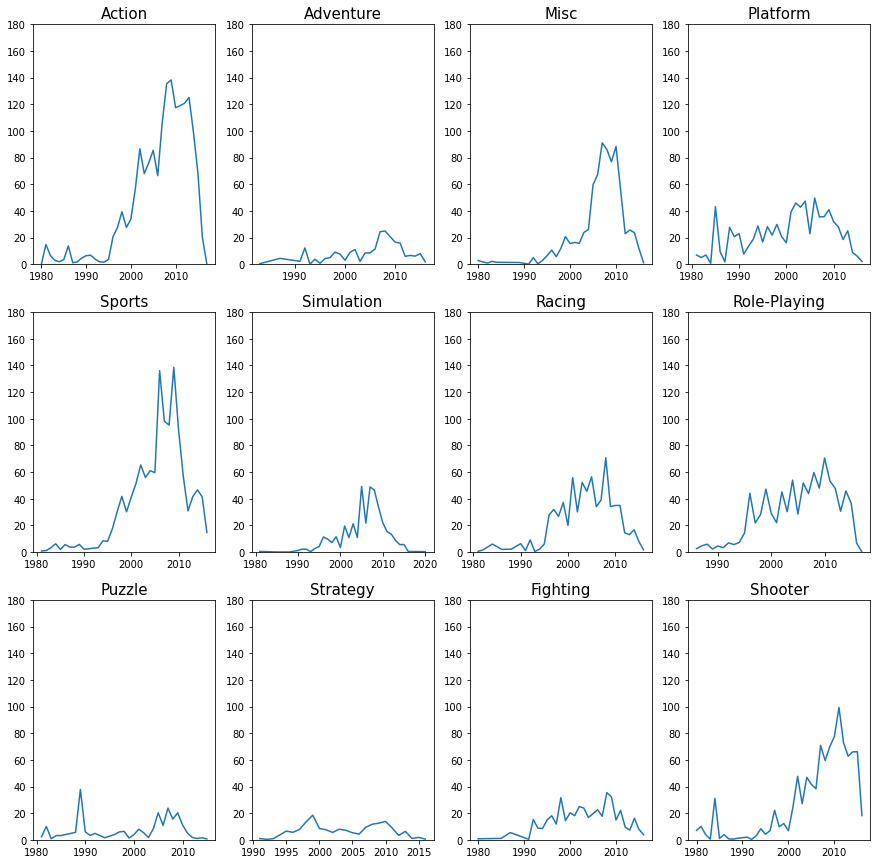

In [ ]:
#연도별 각 장르의 추세
plt.figure(figsize=(15,15))
col_genre = df['Genre'].unique()
for i,genre_name in enumerate(col_genre):
  plt.subplot(3,4,1+i)
  plt.plot(df[df['Genre'] == col_genre[i]].groupby('Year')['Global_Sales'].sum())
  plt.title(str(genre_name),fontsize=15)
  plt.ylim(0,180)
plt.show()

**해석: 2010년도로 갈수록 Shooter, Sports, Action 장르 선호도가 높아지고 있다. **

In [19]:
#가설검정(Hypothesis Test)
#귀무가설(H0): 연도와 트렌드 사이에는 관련성이 없다.
#대립가설(H1): 연도와 트렌드 사이에는 관련성이 있다. 
from scipy.stats import chisquare
chi_yeargenre = chisquare(df_yeargenre_max['Global_Sales'])
chi_yeargenre
print('chi square: {}'.format(chi_yeargenre[0]))
print('p value: {}'.format(chi_yeargenre[1]))

chi square: 1415.6816469600708
p value: 1.236820071981916e-272


P Value 값이 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택한다. 즉, 연도와 트렌드 사이에는 연관성이 있다. 



연도별 플랫폼 인기 추이

In [20]:
df_yearplatform = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()  #year, platform 칼럼 기준 global sales의 합계를 구하고 새로 인덱스 번호 지정
df_yearplatform_bool = df_yearplatform.groupby('Year')['Global_Sales'].transform(max) == df_yearplatform['Global_Sales']  #max값이 그 해당연도의 값이라고 지정
df_yearplatform_max = df_yearplatform[df_yearplatform_bool].reset_index(drop=True)
df_yearplatform_max

,Year,Platform,Global_Sales
0,1980,2600,10.88
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,NES,10.96
4,1984,NES,50.08
5,1985,NES,53.44
6,1986,NES,36.41
7,1987,NES,19.76
8,1988,NES,45.01
9,1989,GB,64.97


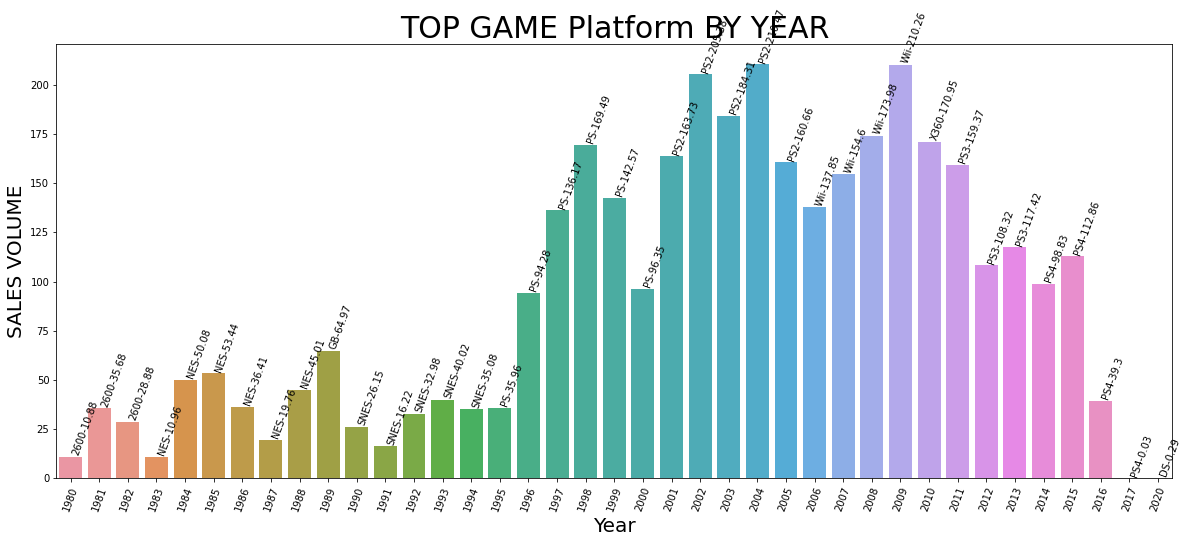

In [21]:
platform = df_yearplatform_max['Platform']

plt.figure(figsize=(20, 8))
k = sns.barplot(x='Year', y='Global_Sales', data=df_yearplatform_max)

#다음 아래는, 좀더 짧은 코드로 시각화를 구현하고 싶어서 Kaggle에서 코드를 빌려와봤습니다. 주석을 통해 코드의 논리를 해석해보았습니다. 

index = 0         #index번호 0으로 지정
for value in df_yearplatform_max['Global_Sales']:     #for문을 통해 global sales value값들을 value변수에 넣어 돌린다. 
    k.text(index, value + 1, str(platform[index] + '-' +str(round(value, 2))), color='#000', size=10, rotation= 70)   
  #index = 0일때부터 시작
  #위 k.text() = k barplot위에 텍스트를 넣는다.
  #k.text(index, value+1) = 0인 인덱스번호와 그 value값의 순서
  #str(platform[index] + '-' +str(round(value, 2))) 인덱스 번호의 해당 플랫폼이름 + 그 값의 소수점 두 자리로 반올림한 문자열 
    index += 1
  #그다음 index값에 +1을 하는 방식으로 계속 진행한다. 


plt.title("TOP GAME Platform BY YEAR", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("SALES VOLUME", fontsize=20)

plt.xticks(rotation=70)
plt.show()

**이 후 for문을 이용한 코드는 위에서 진행하였던 시각화자료(title:"TOP GAME Platform BY YEAR")의 코드와 같은 방식으로 진행하였고 학습하였습니다.**

**C.출고량 높은 게임분석(플랫폼별, 장르별, 게임회사별)**

In [ ]:
#2010년 이후 가장 출고량이 많았던 top300 dataset 만들기
top50_sales = df[df.Year > 2010].sort_values(by='Global_Sales' ,ascending=False)
top50_sales = top50_sales.head(50).reset_index(drop=True)
top50_sales

Platform

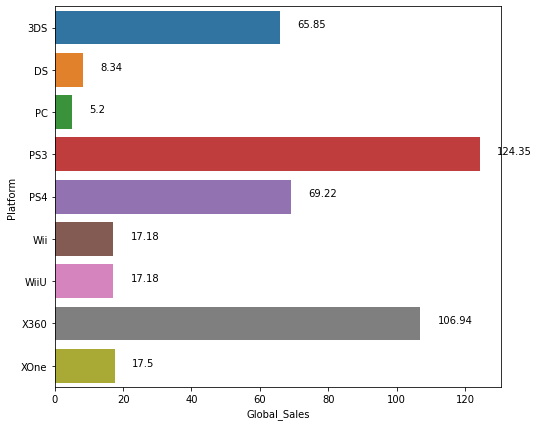

In [26]:
#TOP50 Platform 시각화
top50_platform = top50_sales.groupby(['Platform'])['Global_Sales'].sum().reset_index()
platform = top50_platform['Platform'].values
plt.figure(figsize=(8, 7))
top50_platform_sales = sns.barplot(x ='Global_Sales', y='Platform', data=top50_platform)


index = 0
for value in top50_platform['Global_Sales']:
    top50_platform_sales.text(x=value + 5, y=index, s=str(round(value,2)),
            color='black', size=10)
    index+=1


plt.show()
# 최근 10년간 출고량이 많았던 플랫폼은 PS3,PS4,X360이다.

Genre

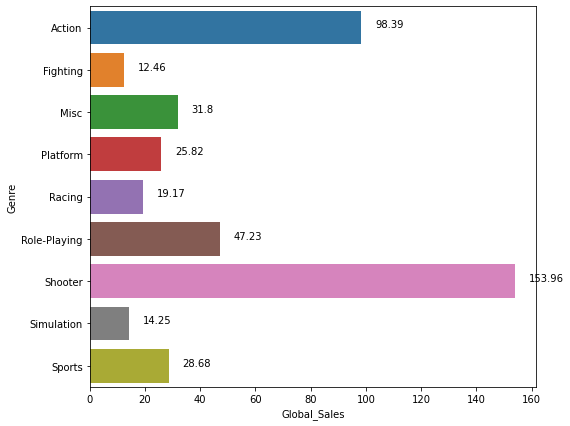

In [27]:
# top50 Genre 그래프
top50_genre = top50_sales.groupby(['Genre'])['Global_Sales'].sum().reset_index()
genre = top50_genre['Genre'].values
plt.figure(figsize=(8, 7))
top50_genre_sales = sns.barplot(x ='Global_Sales', y='Genre', data=top50_genre)

index = 0
for value in top50_genre['Global_Sales']:
    top50_genre_sales.text(x=value + 5, y=index, s=str(round(value,2)),
            color='black', size=10)
    index+=1
plt.show()
# 최근 10년간 출고량이 많았던 장르는 Shooter,Action,Sports 그리고 Role-Playing 이다.

Publisher

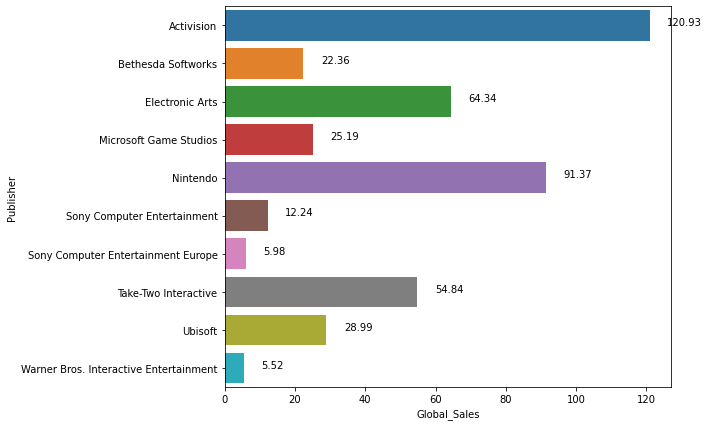

In [28]:
# top50 Publisher 그래프
top50_publisher = top50_sales.groupby(['Publisher'])['Global_Sales'].sum().reset_index()
publisher = top50_publisher['Publisher'].values
plt.figure(figsize=(8, 7))
top50_publisher_sales = sns.barplot(x ='Global_Sales', y='Publisher', data=top50_publisher)

index = 0
for value in top50_publisher['Global_Sales']:
    top50_publisher_sales.text(x=value + 5, y=index, s=str(round(value,2)),
            color='black', size=10)
    index+=1


plt.show()
# 최근 10년간 출고량이 많았던 회사는 Activision,Nintendo,Electronic Arts 이다.

In [30]:
Genre_filter = (df.Genre == 'Shooter') & (df.Year > 2010) # 조건식 작성
df_shooter = df.loc[Genre_filter].reset_index(drop = True)
df_shooter

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Years
0,World of Tanks,PC,2011,Shooter,Wargaming.net,0.00,0.23,0.00,0.06,0.29,2010~2020
1,Crysis 3,X360,2013,Shooter,Electronic Arts,0.51,0.33,0.01,0.08,0.93,2010~2020
2,Payday 2,XOne,2015,Shooter,505 Games,0.08,0.07,0.00,0.01,0.16,2010~2020
3,Cabela's Big Game Hunter: Pro Hunts,WiiU,2014,Shooter,Activision,0.02,0.00,0.00,0.00,0.02,2010~2020
4,Call of Juarez: The Cartel,PS3,2011,Shooter,Ubisoft,0.12,0.13,0.00,0.05,0.30,2010~2020
...,...,...,...,...,...,...,...,...,...,...,...
309,James Bond 007: Legends,X360,2012,Shooter,Activision,0.13,0.14,0.00,0.03,0.30,2010~2020
310,SpongeBob SquarePants: Plankton's Robotic Revenge,X360,2013,Shooter,Activision,0.04,0.00,0.00,0.00,0.04,2010~2020
311,Call of Duty: Advanced Warfare,PC,2014,Shooter,Activision,0.14,0.23,0.00,0.04,0.41,2010~2020
312,Bulletstorm,PS3,2011,Shooter,Electronic Arts,0.23,0.20,0.01,0.08,0.52,2010~2020


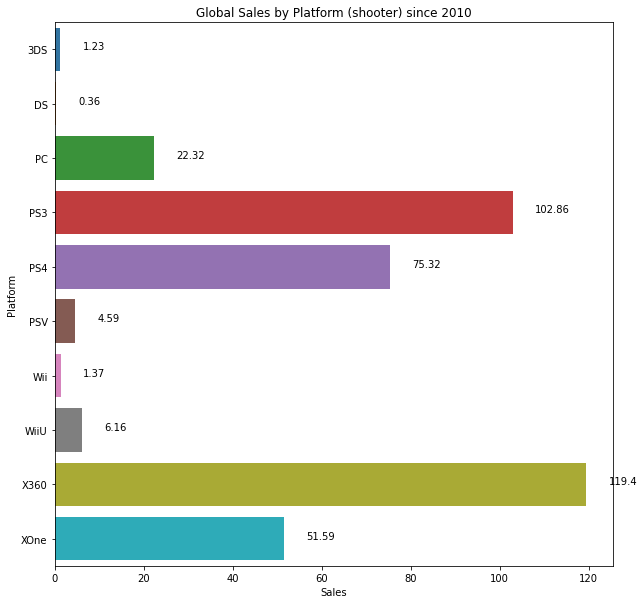

In [32]:
df_shooter_platform = df_shooter.groupby(['Platform'])['Global_Sales'].sum().reset_index()
platform = df_shooter_platform['Platform'].values
plt.figure(figsize=(10, 10))
df_shooter_platform_sales = sns.barplot(x ='Global_Sales', y='Platform', data=df_shooter_platform)

index = 0
for value in df_shooter_platform['Global_Sales']:
    df_shooter_platform_sales.text(x=value + 5, y=index, s=str(round(value,2)),
            color='black', size=10)
    index+=1
plt.title('Global Sales by Platform (shooter) since 2010')
plt.xlabel('Sales')
plt.ylabel('Platform')
plt.show()

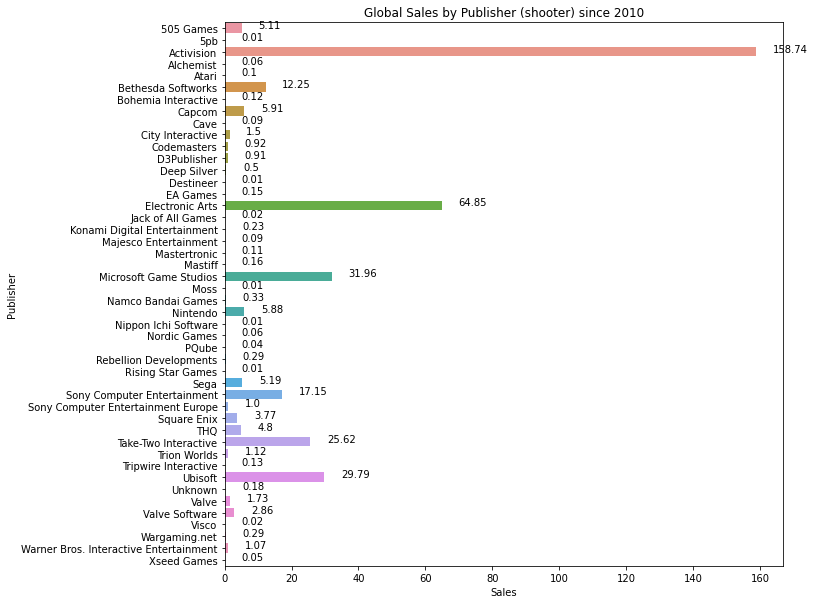

In [33]:
df_shooter_Publisher = df_shooter.groupby(['Publisher'])['Global_Sales'].sum().reset_index()
Publisher = df_shooter_Publisher['Publisher'].values
plt.figure(figsize=(10, 10))
df_shooter_Publisher_sales = sns.barplot(x ='Global_Sales', y='Publisher', data=df_shooter_Publisher)

index = 0
for value in df_shooter_Publisher['Global_Sales']:
    df_shooter_Publisher_sales.text(x=value + 5, y=index, s=str(round(value,2)),
            color='black', size=10)
    index+=1
plt.title('Global Sales by Publisher (shooter) since 2010')
plt.xlabel('Sales')
plt.ylabel('Publisher')
plt.show()